In [1]:
import migrids_lite as mlt
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# get all the data
all_data = pd.read_csv('example_data.tab', delimiter='\t')

# get the electric load from the data
electric_load = mlt.EnergyType.EnergyType('electric_load', all_data['load'])

# get the resource available
# the just 1 resource isn't enough to use the battery, so we make the resource bigger by a multiplier
solar_energy = mlt.EnergyType.EnergyType('resource', all_data['solar_energy'], multiplier=3)

In [3]:
# create a generator, this one is 400 kW
four_hund = mlt.Generator.Generator('four_hund', 400, 0.30, {0.50: 14, 1.00: 28})

# build the power house, this is required even if there's only 1 generator
power_house = mlt.Powerhouse.Powerhouse((four_hund,))

In [4]:
# build the battery called 'example_batt', rated input is 50 kW, output is 100 kW,
# and capacity is 150 kWh, minimum capacity percent is 30
battery = mlt.Storage.Storage('example_batt', 50, 100, 150, 0.3)

In [5]:
# calculate in storage time shifting mode
gen_shifting = mlt.System.System(electric_load, power_house, 's', storage=battery, resource_input=solar_energy)

calculating in storage timeshift


In [6]:
print(gen_shifting.shift.frame)
print(gen_shifting.fuel_usages.totals)

    electric_load  resource  resource_to_load  diesel_out  charge_dis  \
0               0         0                 0         NaN         NaN   
1             250         0                 0       250.0        -0.0   
2             240         0                 0       240.0        -0.0   
3             230         0                 0       230.0        -0.0   
4             220         0                 0       220.0        -0.0   
5             200        30                30       170.0        -0.0   
6             190        45                45       145.0        -0.0   
7             220        75                75       145.0        -0.0   
8             215       105                95       120.0        10.0   
9             240       135               120       120.0        15.0   
10            250       180               130       120.0        50.0   
11            255       210               135       120.0        30.0   
12            245       300               125      

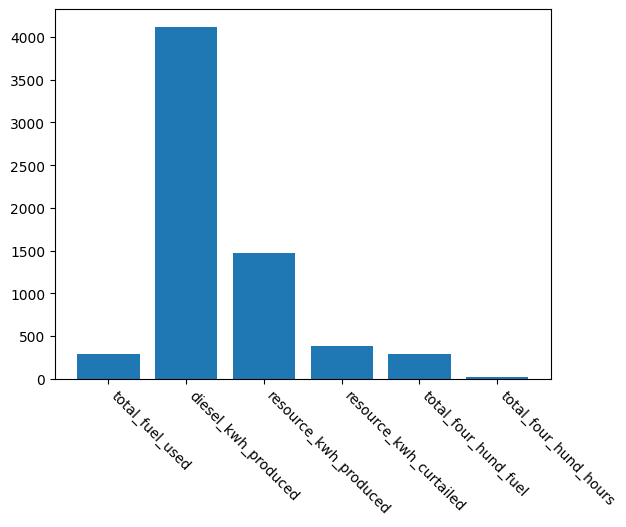

In [7]:
plt.bar(gen_shifting.fuel_usages.totals.keys(), gen_shifting.fuel_usages.totals.values())
plt.xticks(rotation = -45, ha='left')
plt.show()